# Visualise the Configuration Space

In [1]:
import numpy as np
from dscribe.descriptors import SOAP
from ase.io import read, write

Here, we represent each structure as a (feature) vector and then perform data analysis on the feature space. The representation (descriptor) adopted is called `Smooth Overlap of Atomic Position (SOAP)` (On Representing Chemical Environments. Phys. Rev. B 2013, 87, 184115.). It uses spherical harmonics to approximate the atomic denisty (neighbours within a radius cutoff) around the central atom, which is a `non-parametric` approach.

You may notice that deep potential model gives a representation as well (model/descriptor in input.json). However, this is a `trainable` representation. It gives the model more flexible while it needs several trainings to reach a satisfactory representation.

## Compute structural descriptors

![title](assets/soap.png)

![title](assets/tensors.png)

In [2]:
def compute_features(structures):
    """"""
    soap = SOAP(
        species = ["Si"],
        r_cut = 6.0,
        n_max = 12,
        l_max = 8,
        sigma = 0.2,
        average = "inner",
        periodic = True
    )
    
    return soap.create(structures, n_jobs=6)

In [3]:
solid_structures = read("./assets/perturb.xyz", ":")

In [4]:
solid_features = compute_features(solid_structures)

In [5]:
solid_features.shape

(400, 702)

In [6]:
liquid_structures_1bar = read("./assets/md-1bar.xyz", ":")
liquid_features_1bar = compute_features(liquid_structures_1bar)

In [7]:
liquid_structures_10kbar = read("./assets/md-10kbar.xyz", ":")
liquid_features_10kbar = compute_features(liquid_structures_1bar)

In [8]:
liquid_structures_neg10kbar = read("./assets/md-neg10kbar.xyz", ":")
liquid_features_neg10kbar = compute_features(liquid_structures_neg10kbar)

In [9]:
feature_groups = dict(
    solid = solid_features,
    liquid_1bar = liquid_features_1bar,
    liquid_10kbar = liquid_features_10kbar,
    liquid_neg10kbar = liquid_features_neg10kbar
)

## Visualise the Configuration Space

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
def plot_configuration_space(feature_groups):
    # combine features togather
    features = np.vstack(list(feature_groups.values()))
    reducer = PCA(n_components=2)
    reducer.fit(features)
    #
    for curr_label, curr_features in feature_groups.items():
        proj = reducer.transform(curr_features)
        plt.scatter(
            proj[:, 0], proj[:, 1], alpha=0.5, label=curr_label
        )
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.legend()
    
    return

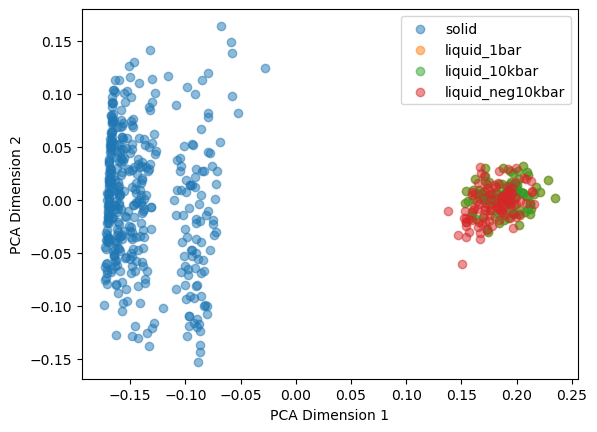

In [12]:
plot_configuration_space(feature_groups)